In [1]:
from giskard_vision.object_detection.models.wrappers import DetrFinetunedFaceDetectionHuggingFaceModel

model = DetrFinetunedFaceDetectionHuggingFaceModel()

/Users/inoki/.virtualenvs/giskard-vision/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from giskard_vision.object_detection.dataloaders.loaders import DataLoader300WFaceDetection
from pathlib import Path

ds = DataLoader300WFaceDetection(
    dir_path=Path().resolve().parent / "landmark_detection" / "datasets" / "300W" / "sample"
)

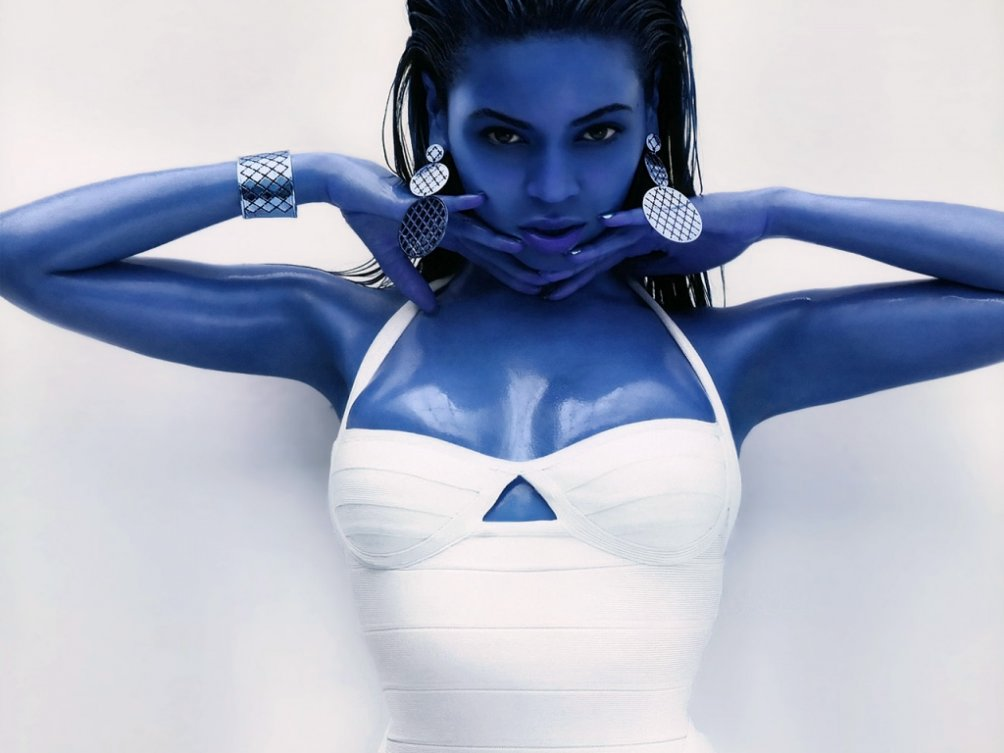

In [3]:
from PIL import Image

Image.fromarray(ds.get_image(0), "RGB")

In [4]:
ds.get_labels(0)

array([446.   ,  91.   , 647.302, 271.435])

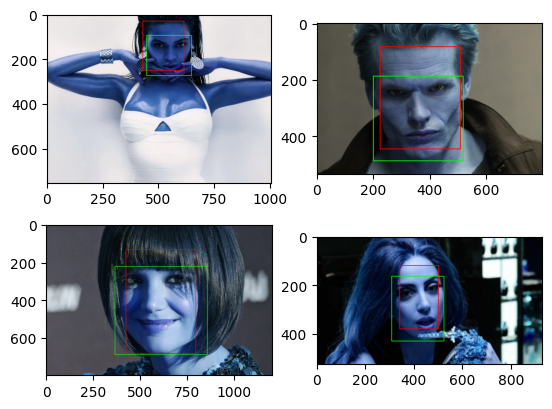

In [5]:
import cv2

import matplotlib.pyplot as plt

for i in range(4):
    plt.subplot(2, 2, i + 1)

    img = ds.get_image(i)
    labels = ds.get_labels(i)
    prediction = model.predict_image(Image.fromarray(img, "RGB"))

    cv2.rectangle(
        img,
        (int(prediction[0]), int(prediction[1])),
        (int(prediction[2]), int(prediction[3])),
        (255, 0, 0),
        2,
    )

    # Draw ground truth bounding box (in green)
    cv2.rectangle(
        img,
        (int(labels[0]), int(labels[1])),
        (int(labels[2]), int(labels[3])),
        (0, 255, 0),
        2,
    )

    # Display the image with bounding boxes
    plt.imshow(img)

plt.show()